# Hallmark prediction exercise - Narang, Mandeep

# keep this file with the 100 .csv data files in the same folder and run this file.

In [1]:
## importing required packages
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import graphviz
from sklearn import tree
from matplotlib.pylab import rcParams
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 15, 6

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive









Importing 100 Data files into one dataframe.


In [2]:
##importing data into one dataframe
df = pd.read_csv("data_for_ex_1.csv")
for i in range(2,101):
    a = "data_for_ex_"+str(i)+".csv"
    df1 = pd.read_csv(a)
    global df
    df = df.append(df1)
##Dimentions check
df.shape

(200000, 464)

## Data Exploration

In [3]:
##Information of Data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 1999
Columns: 464 entries, Unnamed: 0 to target
dtypes: float64(396), int64(19), object(49)
memory usage: 709.5+ MB


In [4]:
##Have a look on fields
sorted(df1)

['Unnamed: 0',
 'X',
 'target',
 'text',
 'v10',
 'v100',
 'v101',
 'v102',
 'v103',
 'v104',
 'v105',
 'v106',
 'v107',
 'v108',
 'v109',
 'v11',
 'v110',
 'v111',
 'v112',
 'v113',
 'v114',
 'v115',
 'v116',
 'v117',
 'v118',
 'v119',
 'v12',
 'v120',
 'v121',
 'v122',
 'v123',
 'v124',
 'v125',
 'v126',
 'v127',
 'v128',
 'v129',
 'v13',
 'v130',
 'v131',
 'v132',
 'v133',
 'v134',
 'v135',
 'v136',
 'v137',
 'v138',
 'v139',
 'v14',
 'v140',
 'v141',
 'v142',
 'v143',
 'v144',
 'v145',
 'v146',
 'v147',
 'v148',
 'v149',
 'v15',
 'v150',
 'v151',
 'v152',
 'v153',
 'v154',
 'v155',
 'v156',
 'v157',
 'v158',
 'v159',
 'v16',
 'v160',
 'v161',
 'v162',
 'v163',
 'v164',
 'v165',
 'v166',
 'v167',
 'v168',
 'v169',
 'v17',
 'v170',
 'v171',
 'v172',
 'v173',
 'v174',
 'v175',
 'v176',
 'v177',
 'v178',
 'v179',
 'v18',
 'v180',
 'v181',
 'v182',
 'v183',
 'v184',
 'v185',
 'v186',
 'v187',
 'v188',
 'v189',
 'v19',
 'v190',
 'v191',
 'v192',
 'v193',
 'v194',
 'v195',
 'v196',
 'v197

In [5]:
##Have a look on data
df.head()

,Unnamed: 0,text,X,v2,v3,v4,v5,v6,v7,v8,...,v453,v454,v455,v456,v457,v458,v459,v460,v461,target
0,1,village the russian cossacks and bugler and th...,162913,1975,6,41,C,A,E,A,...,B,B,B,D,B,B,B,B,B,0
1,2,narrated it at lima to a lounging circle of my...,125620,0,0,0,G,G,F,G,...,B,B,B,E,L,G,B,A,A,0
2,3,lieutenant colonel den�sov better known as ‘v�...,75253,1954,3,62,E,A,C,A,...,B,B,B,C,B,B,B,A,A,0
3,4,a man without convictions without habits witho...,193502,1963,4,53,D,A,E,A,...,B,B,B,D,E,B,B,A,A,0
4,5,order what can be executed but to know what ca...,171707,1967,1,50,C,A,B,B,...,B,B,B,D,D,A,B,A,A,0


In [6]:
df.tail()

,Unnamed: 0,text,X,v2,v3,v4,v5,v6,v7,v8,...,v453,v454,v455,v456,v457,v458,v459,v460,v461,target
1995,199996,kept coming into her eyes anna mikh�ylovna wit...,28041,1965,8,51,C,C,A,B,...,B,B,B,D,K,D,B,A,A,0
1996,199997,who—dreading this love affair which might hind...,85108,0,0,0,G,E,E,A,...,B,B,B,C,B,B,B,A,A,1
1997,199998,“pierre been back long” someone shouted pierre...,193412,1958,6,58,D,B,C,B,...,B,B,C,D,I,E,B,A,A,0
1998,199999,furiously up and then all eyes were turned on ...,92371,1968,0,48,C,E,A,B,...,B,B,B,D,B,B,B,B,B,0
1999,200000,said “that’s bad go on go on”,100314,0,0,0,G,C,E,C,...,B,B,B,D,B,E,B,A,B,0


In [7]:
##Removing Text and unwanted column from the dataset
df = df.iloc[:,1:]


In [8]:
Hdf = df.iloc[:,1:]

### Generating Dummy Variables

**Categorical varibles are always tought call to shortlist. here in this case i do not have any idea of domain of the data, so i can not remove any categorical variable by its name/significance. Other way is to convert the categorical variables to Dummy variables and then test their significance and importance on "target" statistically **<br>

In [9]:
#Generating Dummy variable from Categorical variables
Hdf = pd.get_dummies(Hdf,drop_first = True)

In [10]:
Hdf.head()

,X,v2,v3,v4,v11,v12,v14,v17,v18,v19,...,v458_C,v458_D,v458_E,v458_F,v458_G,v458_H,v459_B,v459_C,v460_B,v461_B
0,162913,1975,6,41,0,3.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,125620,0,0,0,0,2.096572,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,75253,1954,3,62,0,1.000000,0,0,0,20,...,0,0,0,0,0,0,1,0,0,0
3,193502,1963,4,53,0,3.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,171707,1967,1,50,0,2.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0



### Missing Value Check

In [11]:
##Missing Value check
Hdf.isnull().sum().sum()

0

### Data summary

In [12]:
Hdf.describe()

,X,v2,v3,v4,v11,v12,v14,v17,v18,v19,...,v458_C,v458_D,v458_E,v458_F,v458_G,v458_H,v459_B,v459_C,v460_B,v461_B
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.00000
mean,100000.500000,1495.541315,4.726005,40.553885,5.180845,2.038541,0.724475,11.395170,37.265615,2.115735,...,0.054885,0.220155,0.253795,0.112105,0.008135,0.020830,0.921080,0.071810,0.23409,0.38724
std,57735.171256,834.528677,4.135541,27.375180,41.926216,1.096942,10.475226,81.780998,138.050060,7.987867,...,0.227756,0.414352,0.435183,0.315496,0.089827,0.142815,0.269615,0.258174,0.42343,0.48712
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,50000.750000,1926.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000
50%,100000.500000,1954.000000,4.000000,47.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000
75%,150000.250000,1969.000000,8.000000,62.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.00000
max,200000.000000,1998.000000,12.000000,99.000000,999.000000,4.000000,999.000000,999.000000,999.000000,636.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


### Outlier detection and treatment
**Here we can see that there are so many column with very high Max value but very less mean and median, so we should have a look on outliers too once. Lets investigate!**

In [13]:
# defining the function for outlier removal
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df


In [14]:

remove_outlier(Hdf).head()


,X,v2,v3,v4,v11,v12,v14,v17,v18,v19,...,v458_C,v458_D,v458_E,v458_F,v458_G,v458_H,v459_B,v459_C,v460_B,v461_B


**Here we can see that if we remove outliers from all the varibles we do not get any row remained in the data.
so there is a possibility that the entries we were thinking of outliers, they could be influencers.
Now we should move forward with all the data and try to find imortant variables for "traget" variable***

### feature selection 
**Here we are going to use Random forest model to find most important variable for "target" field.
we have so many column fields in the data and out goal is to predict the value of "target" variable. we have so many ways to do that, to handle the curse of dimentionality we could have used PCA(Principal componant analysis) but in that we will lose our actual variables that we do not want. we want to see the influece of any variable on "target". so we can use any of Random forest or Decision Tree model.
Here we are going to use randon forest model to find Important Features!**

## Data Sampling

In [15]:
# Using numpy to convert to arrays

# Labels are the values we want to predict
labels = np.array(Hdf['target'])

# Remove the labels from the features
features= Hdf.drop('target', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [16]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets 
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [17]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (150000, 682)
Training Labels Shape: (150000,)
Testing Features Shape: (50000, 682)
Testing Labels Shape: (50000,)


## Model Training for Feature selection
** we have splittied the data into Train and test part. Lets Train the model on train data and see how it is working on test data**

In [18]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

### How to find Importance of indvidual Feature


In [19]:
# Get numerical feature importances
importances = list(rf.feature_importances_)


In [20]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [21]:
# Print out the feature and importances 
[print('Variable:  {} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable:  v211 Importance: 0.595
Variable:  v131 Importance: 0.138
Variable:  v406 Importance: 0.053
Variable:  v115 Importance: 0.044
Variable:  v413 Importance: 0.022
Variable:  v201 Importance: 0.013
Variable:  v408 Importance: 0.011
Variable:  v272 Importance: 0.009
Variable:  v305 Importance: 0.009
Variable:  v404 Importance: 0.009
Variable:  v175 Importance: 0.006
Variable:  v182 Importance: 0.006
Variable:  v341 Importance: 0.006
Variable:  v146 Importance: 0.005
Variable:  v198 Importance: 0.005
Variable:  v233 Importance: 0.005
Variable:  v283 Importance: 0.005
Variable:  v358 Importance: 0.005
Variable:  v94 Importance: 0.004
Variable:  v110 Importance: 0.004
Variable:  v386 Importance: 0.004
Variable:  v304 Importance: 0.003
Variable:  v375 Importance: 0.003
Variable:  v103 Importance: 0.002
Variable:  v105 Importance: 0.002
Variable:  v121 Importance: 0.002
Variable:  v141 Importance: 0.002
Variable:  v155 Importance: 0.002
Variable:  v165 Importance: 0.002
Variable:  v202

#### In Above Result we can see that there are very few variables are there who has significant effect on "target". Let is take all the variable with importance>0.005 and run the classificatin model with them only**

In [22]:
##extracting the column names for final data set
feature_importances = np.array(feature_importances)
feature_importances_df = pd.DataFrame(feature_importances,columns = ["var","importance"])
feature_importances_df["importance"] = feature_importances_df.importance.astype(float)

In [23]:
##filtering top features
x=feature_importances_df[feature_importances_df.importance>=0.005]



In [24]:
##making Final dataset
important_feature_list=x.iloc[:,0].values.T.tolist()


In [25]:
df1 = Hdf[important_feature_list]

## Data Exploration on important features

Correlation Matrix

In [26]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "10pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "10pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '25pt')])
]
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)


df1.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '9pt'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,v211,v131,v406,v115,v413,v201,v408,v272,v305,v404,v175,v182,v341,v146,v198,v233,v283,v358
v211,1,0.32,-0.64,0.44,0.3,-0.27,-0.44,0.4,0.3,-0.37,0.41,0.26,0.11,-0.62,0.014,-0.29,0.41,0.34
v131,0.32,1,-0.52,0.022,-0.17,0.085,-0.57,0.77,0.039,-0.22,0.51,-0.29,0.38,-0.57,-0.33,0.53,-0.024,0.52
v406,-0.64,-0.52,1,-0.37,-0.27,0.21,0.69,-0.57,-0.27,0.54,-0.5,-0.082,-0.22,0.63,0.074,0.11,-0.36,-0.52
v115,0.44,0.022,-0.37,1,0.41,-0.17,-0.21,0.12,0.086,-0.27,0.1,0.39,0.098,-0.25,0.25,-0.26,0.23,0.23
v413,0.3,-0.17,-0.27,0.41,1,-0.34,-0.067,-0.21,0.46,-0.3,0.28,0.48,-0.0024,-0.025,0.12,-0.47,0.37,0.24
v201,-0.27,0.085,0.21,-0.17,-0.34,1,0.04,0.008,-0.5,0.18,-0.25,-0.12,-0.1,0.069,0.26,0.31,-0.37,-0.064
v408,-0.44,-0.57,0.69,-0.21,-0.067,0.04,1,-0.53,0.0074,0.48,-0.42,-0.051,-0.13,0.6,0.032,-0.087,-0.15,-0.42
v272,0.4,0.77,-0.57,0.12,-0.21,0.008,-0.53,1,0.031,-0.24,0.38,-0.18,0.37,-0.74,-0.2,0.36,0.021,0.37
v305,0.3,0.039,-0.27,0.086,0.46,-0.5,0.0074,0.031,1,-0.18,0.57,0.074,0.22,-0.049,-0.46,-0.28,0.4,0.18
v404,-0.37,-0.22,0.54,-0.27,-0.3,0.18,0.48,-0.24,-0.18,1,-0.29,-0.25,-0.098,0.3,0.066,0.17,-0.29,-0.34


In the above matrix we can see that darker color has strong relations. Red indicates the negative and blue indicates the positive relationship.

v211       AxesSubplot(0.125,0.772143;0.227941x0.107857)
v131    AxesSubplot(0.398529,0.772143;0.227941x0.107857)
v406    AxesSubplot(0.672059,0.772143;0.227941x0.107857)
v115       AxesSubplot(0.125,0.642714;0.227941x0.107857)
v413    AxesSubplot(0.398529,0.642714;0.227941x0.107857)
v201    AxesSubplot(0.672059,0.642714;0.227941x0.107857)
v408       AxesSubplot(0.125,0.513286;0.227941x0.107857)
v272    AxesSubplot(0.398529,0.513286;0.227941x0.107857)
v305    AxesSubplot(0.672059,0.513286;0.227941x0.107857)
v404       AxesSubplot(0.125,0.383857;0.227941x0.107857)
v175    AxesSubplot(0.398529,0.383857;0.227941x0.107857)
v182    AxesSubplot(0.672059,0.383857;0.227941x0.107857)
v341       AxesSubplot(0.125,0.254429;0.227941x0.107857)
v146    AxesSubplot(0.398529,0.254429;0.227941x0.107857)
v198    AxesSubplot(0.672059,0.254429;0.227941x0.107857)
v233          AxesSubplot(0.125,0.125;0.227941x0.107857)
v283       AxesSubplot(0.398529,0.125;0.227941x0.107857)
v358       AxesSubplot(0.672059

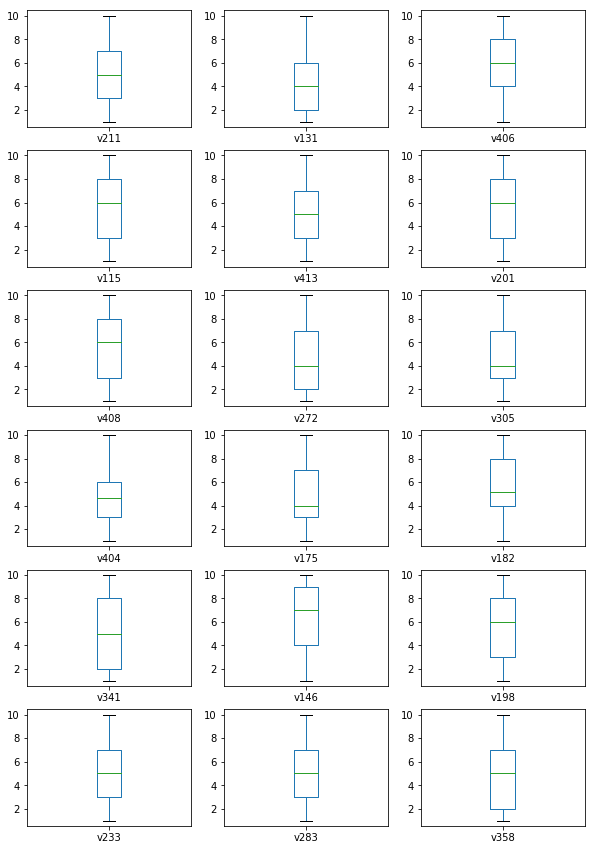

In [27]:
#Box plots for each variable, we can see the distribution of data in each variable

df1.plot(kind='box', layout = (6,3) ,subplots=True, figsize = (10,15) , sharex=False)
plt.show()

In [28]:
## Distribution of data with respect to target variable


df2 = Hdf['target']


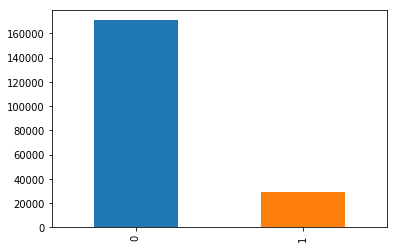

In [29]:
df2.value_counts().plot(kind = 'bar')

In [30]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

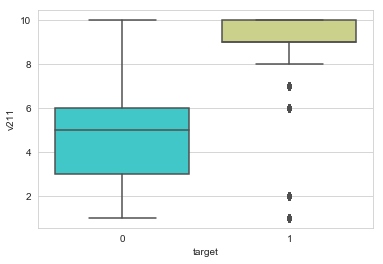

In [31]:
#"v211" vs target

sns.boxplot(x="target", y="v211",  data=Hdf,palette='rainbow')


**By above plot we cleary can see how 1 is oriented towards high value of V211**

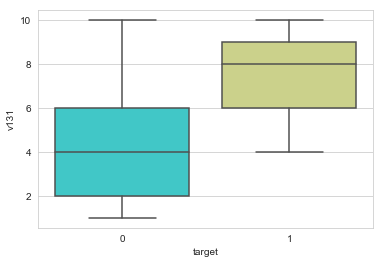

In [32]:
sns.boxplot(x="target", y="v131",  data=Hdf,palette='rainbow')



**By above plot we can say that high value of v131 has some positive effect on 1**

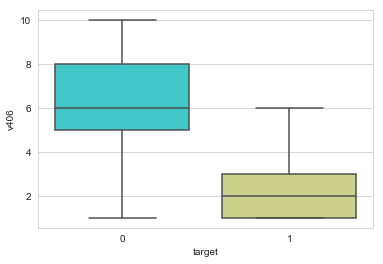

In [33]:
sns.boxplot(x="target", y="v406",  data=Hdf,palette='rainbow')



**By above plot we can see that for 1 low values of v406 is favorable.
we can have some deep idea by running some classification models on this data.**


In [34]:
X = Hdf[important_feature_list]
X.shape
y = Hdf["target"]


(200000, 18)

In [35]:
X.columns

Index(['v211', 'v131', 'v406', 'v115', 'v413', 'v201', 'v408', 'v272', 'v305',
       'v404', 'v175', 'v182', 'v341', 'v146', 'v198', 'v233', 'v283', 'v358'],
      dtype='object')

In [36]:
labels = ['v211', 'v131', 'v406', 'v115', 'v413', 'v201', 'v408', 'v272', 'v305',
       'v404', 'v175', 'v182', 'v341', 'v146', 'v198', 'v233', 'v283', 'v358']

In [37]:
  ! brew install graphviz


Updating Homebrew...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> Updated Formulae
bigloo          flyway          go@1.10         leiningen       solr
binaryen        fx              grpc            libxmlsec1      wolfssl
cython          git             gtk+3           pngquant

To reinstall 2.40.1, run `brew reinstall graphviz`


## Classification model
We have seen the data distribution wrt target and also have found the most important variables. Now we are going to rum some classification models. there are a number of models are there for prediction. we are going to use decsion tree and logistic regression. 

In [38]:
## data sampling
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 100)                           
                           

    
    
## Defining a function named "plot_tree" to plot decision tree 

def plot_tree(crit, split, depth , min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0  
      , criterion = crit
      , splitter = split
      , max_depth = depth
      , min_samples_split=min_split
      , min_samples_leaf=min_leaf)
    estimator.fit(X_train, y_train)   ##Training the model
    
    predictions = estimator.predict(X_test) ## testing the model on test data
    
    print("Controlled Decision Tree : Change the above parameters and observe the difference.","\n","To see the effect of pruning, change the tree depth and notice the change in various metrics")
    print("\n")
    
    ##overfitting check

    print("Acuracy on training set: {:.3f}".format(estimator.score(X_train, y_train)*100))
    print("Acuracy on test set: {:.3f}".format(estimator.score(X_test, y_test)*100))
    
    ##confusion matrix
    print("\n Confusion Matrix: \n")
    print(confusion_matrix(y_test, predictions))
    print("\n Classification Report: \n")
    print(classification_report(y_test, predictions))
    graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=labels, rounded = True, impurity = True
      , class_names=['target - 0', 'target - 1']
      , filled = True))
   
    display(SVG(graph.pipe(format='svg')))
    return estimator



##using IPython.core.interactiveshel package for better visualization of tree

inter=interactive(plot_tree        ##using plt_tree function in interactive
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,6,7,8,9,10,11,12]
   , min_split=(2)
   , min_leaf=5)
display(inter)                              




interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

 From the above model we can see that our model is very good at prediction. It has aprox 97% accuracy on both train and test data. It means model is neither underfit nor overfit. it is a generalized model.

## Learning Curves
Learning curves are very insightful visualization technique for analysing the model and optimizing it.
in this we are going to plot accuracy vs tree depth and see how acuracy changes as we increase the tree depth.

In [39]:

def learning_curve(crit, split, min_split, min_leaf=0.2):
    accuracy_test=[None]*10
    accuracy_train=[None]*10
    count=1
    for max_depth in range(1,10):
        estimator = DecisionTreeClassifier(random_state = 100 
        , criterion = crit
        , splitter = split
        , max_depth = max_depth                                   
        , min_samples_split=min_split
        , min_samples_leaf=min_leaf)
        estimator.fit(X_train, y_train)
        accuracy_train[count]=estimator.score(X_train, y_train)
        accuracy_test[count]=estimator.score(X_test, y_test)
        count+=1
    ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
    ax1.plot(range(0,10),accuracy_test)
    ax1.plot(range(0,10),accuracy_train)
    plt.title("Decision Tree | Accuracy vs Tree depth")
    plt.xlabel("Tree Depth")
    plt.ylabel("Accuracy")
    plt.legend(['Test Set','Train Set'])   
    

inter=interactive(learning_curve 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , min_split=(2)
   , min_leaf=5)
display(inter)                              



interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In the above curve we can see that our model is showing aprox 100% accuracy after 4 tree depth.

### Logistic regression 
for directionality of odds ratio
We have seen that tree model is predicting very finely. but to see the effect of the indvidual contributer on the odds of happening 1 we can use logistic regression.

In [40]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
mdl = logreg.fit(X_train, y_train)



In [41]:
coef = mdl.coef_
print(coef)
print(mdl.intercept_)

[[ 0.46667041  3.13534879 -0.29770327 -0.51006478  0.25358287 -0.91381486
  -1.24993413  0.88244531  1.31886922 -1.63798941  0.24445406  1.1469839
  -0.26722345 -0.15172479  0.44056628 -1.65555203 -1.17434542  0.29623077]]
[-15.95149339]


In [42]:
np.exp(coef)

array([[ 1.59467572, 22.99665534,  0.74252163,  0.60045668,  1.28863416,
         0.40099157,  0.28652367,  2.41680231,  3.73919079,  0.19437045,
         1.276924  ,  3.14868183,  0.765502  ,  0.85922471,  1.55358673,
         0.1909866 ,  0.30902119,  1.34478046]])

In [43]:
sorted(X_train)

['v115',
 'v131',
 'v146',
 'v175',
 'v182',
 'v198',
 'v201',
 'v211',
 'v233',
 'v272',
 'v283',
 'v305',
 'v341',
 'v358',
 'v404',
 'v406',
 'v408',
 'v413']

These above are the coffecients of indvidual variables. we can see the effect and directionality of effect of each variable on target variable.

In [44]:

##Predicting the test set results and calculating the accuracy

y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [45]:
##Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[42411   191]
 [  235  7163]]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     42602
           1       0.97      0.97      0.97      7398

   micro avg       0.99      0.99      0.99     50000
   macro avg       0.98      0.98      0.98     50000
weighted avg       0.99      0.99      0.99     50000



## ROC Curve to evaluate model
we can evaluate the model by using ROC curve.

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

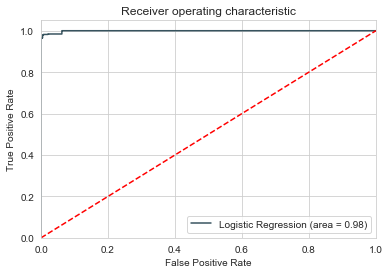

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [48]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.031908
         Iterations 13
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.923    
Dependent Variable: target           AIC:              9608.4152
Date:               2018-12-15 11:34 BIC:              9786.9462
No. Observations:   150000           Log-Likelihood:   -4786.2  
Df Model:           17               LL-Null:          -62393.  
Df Residuals:       149982           LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     13.0000                                     
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
v211    -0.1873     0.0262    -7.1493   0.0000   -0.2386   -0.1360
v131     2.8038     0.0568    49.3402   0.0000    2.6925    2.9152
v4

# Let us see 'text' association with 'target'

Our goal is to check if the 'text' column could be helpful in classifying the 'target' variable 
so we are going to convert these texts to numbers using TfidfVectorizer algorithm and them we will use MultinomialNB to predict the 'target' using those numbers only.
The Idea behind is, if we see a significant accuracy in the classification model consisting only 'text' column then we can say that it is a useful field and we can improve our prrevious model by adding this field into account.

In [66]:

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# we have defined df dataframe as whole consildated data

df.head()

,text,X,v2,v3,v4,v5,v6,v7,v8,v9,...,v453,v454,v455,v456,v457,v458,v459,v460,v461,target
0,village the russian cossacks and bugler and th...,162913,1975,6,41,C,A,E,A,E,...,B,B,B,D,B,B,B,B,B,0
1,narrated it at lima to a lounging circle of my...,125620,0,0,0,G,G,F,G,G,...,B,B,B,E,L,G,B,A,A,0
2,lieutenant colonel den�sov better known as ‘v�...,75253,1954,3,62,E,A,C,A,C,...,B,B,B,C,B,B,B,A,A,0
3,a man without convictions without habits witho...,193502,1963,4,53,D,A,E,A,D,...,B,B,B,D,E,B,B,A,A,0
4,order what can be executed but to know what ca...,171707,1967,1,50,C,A,B,B,E,...,B,B,B,D,D,A,B,A,A,0


In [51]:
#Let us see how many unique entries are there in 'text' column

df.text.unique().shape


(31357,)

In [58]:
## seprating target and text
df_txt = df[['target','text']]
df_txt.head()

,target,text
0,0,village the russian cossacks and bugler and th...
1,0,narrated it at lima to a lounging circle of my...
2,0,lieutenant colonel den�sov better known as ‘v�...
3,0,a man without convictions without habits witho...
4,0,order what can be executed but to know what ca...


In [68]:
## Preparing data for "TfidfVectorizer"
df_tar = df["target"]
df_txt1 = df["text"]


In [71]:
## preparing tfidf_vectorizer for model
tfidf_vectorizer = TfidfVectorizer(min_df=1,stop_words='english')


In [69]:
##spliting the data
txt_train, txt_test, tar_train, tar_test = train_test_split(df_txt1, df_tar, test_size=0.2, random_state=0)


In [70]:
##train text data
txt_train.head()

1478    in our faces and then running away with us lik...
1552    couch was high with a feather bed and five pil...
1475    dead all that he saw and heard seemed to confi...
114     said “nothing but misfortune can come of marry...
1717                               den�sov gave no answer
Name: text, dtype: object

In [72]:
## training the model
tv = tfidf_vectorizer.fit(txt_train)


In [112]:
## lets see what features have been generated
tv.get_feature_names()

['100',
 '100000',
 '102',
 '108',
 '109',
 '11',
 '120',
 '128',
 '13th',
 '15',
 '15th',
 '160000',
 '1671',
 '1695',
 '1726',
 '1775',
 '1776',
 '1779',
 '1789',
 '180',
 '1805',
 '1806',
 '1807',
 '1809',
 '1811',
 '1812',
 '1813',
 '1819',
 '1820',
 '1842',
 '1851',
 '20000000',
 '217',
 '22',
 '25',
 '27',
 '275th',
 '29',
 '30',
 '3rd',
 '40',
 '4000000',
 '48',
 '4th',
 '5400',
 '57',
 '5th',
 '61',
 '666',
 '6me',
 '6th',
 '73',
 '75',
 '80000',
 '81',
 '83',
 '90',
 '91',
 'aah',
 'ab',
 'aback',
 'abaft',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abashed',
 'abated',
 'abatement',
 'abating',
 'abb',
 'abc',
 'abdomen',
 'abdomens',
 'abduction',
 'abed',
 'abegging',
 'abel',
 'abhorring',
 'abide',
 'able',
 'abnormally',
 'aboard',
 'abode',
 'abominable',
 'abominably',
 'abominate',
 'aboriginal',
 'abortions',
 'abounding',
 'aboundingly',
 'abovementioned',
 'abr',
 'abraham',
 'abreast',
 'abridged',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'a

In [79]:
##transforming to numbers 
%time train_tfidf_matrix = tv.transform(txt_train)


CPU times: user 3.36 s, sys: 36.3 ms, total: 3.4 s
Wall time: 3.41 s


In [109]:
##transformed texts to numbers
train_tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
## fitting the model on train 'target' variable
%time model_txt = MultinomialNB().fit(train_tfidf_matrix, tar_train)

CPU times: user 37.5 ms, sys: 15.7 ms, total: 53.1 ms
Wall time: 68.3 ms


In [81]:
##transforming Test text data to numerical
test_tfidf_matrix = tv.transform(txt_test)

In [82]:
## prediction using model
allprediction = model_txt.predict(test_tfidf_matrix)



In [106]:
## confusion matrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(tar_test, allprediction,labels = [0,1]))

[[33025  1135]
 [ 5070   770]]


In [115]:
## model accuracy
print('accuracy% {}'.format(accuracy_score(tar_test, allprediction)*100))



accuracy% 84.48750000000001
